<a href="https://colab.research.google.com/github/Ciprian-H/Data-literacy/blob/main/Data_literacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install dython

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from dython.nominal import associations

In [4]:
from google.colab import files
uploaded = files.upload()

Saving P20_MJE_2021_Data.xlsx to P20_MJE_2021_Data (2).xlsx


In [5]:
import io


In [6]:
MJE = pd.read_excel(io.BytesIO(uploaded['P20_MJE_2021_Data.xlsx']))

In [7]:
MJE.sample(5)

,CoCode,Region,DocumentNo,Year,Period,G/UMJE,Time,Reference Key,Sess. Name,Type,...,Doc. Date,Revers.Dte,Entry Date,Crcy,Closing week based on entry date,Closing/non-closing week based on entry date,Quarter,Closing week at Q-end,Type2,EUR Value
30085,FI85,WE,9390000642,2021,10,GMJE,18:11:13,9390000642FI852021,NaN,XX,...,2021-10-20,NaT,2021-10-22,EUR,Non-closing week,P10 Non-closing week,Q4,NaN,Permanent,414780.00
43690,IT80,SEE,7500000038,2021,7,GMJE,15:31:06,7500000038IT802021,NaN,S2,...,2021-08-03,NaT,2021-08-03,EUR,P7 Tuesday,P7 Tuesday,Q3,NaN,Accrual,38944.32
42350,IN80,IND,8380010896,2021,8,GMJE,08:12:30,8380010896IN802021,NaN,UI,...,2021-08-31,NaT,2021-09-01,INR,P8 Wednesday,P8 Wednesday,Q3,NaN,Permanent,187947.65
5211,BR11,LAT,8380000124,2021,9,UMJE,00:28:01,8380000124BR112021,NaN,UI,...,2021-09-16,NaT,2021-09-17,BRL,Non-closing week,P9 Non-closing week,Q3,NaN,Permanent,2419.68
39783,IN80,IND,7500000250,2021,3,UMJE,11:51:19,7500000250IN802021,NaN,S2,...,2021-03-31,NaT,2021-03-31,INR,P3 Wednesday,P3 Wednesday,Q1,Q1 cutoff,Accrual,63043.06


In [8]:
MJE.shape

(56140, 27)

In [9]:
MJE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56140 entries, 0 to 56139
Data columns (total 27 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   CoCode                                        56140 non-null  object        
 1   Region                                        56140 non-null  object        
 2   DocumentNo                                    56140 non-null  int64         
 3   Year                                          56140 non-null  int64         
 4   Period                                        56140 non-null  int64         
 5   G/UMJE                                        56140 non-null  object        
 6   Time                                          56140 non-null  object        
 7   Reference Key                                 56140 non-null  object        
 8   Sess. Name                                    0 non-null      floa

In [10]:
MJE.isnull().sum()

CoCode                                              0
Region                                              0
DocumentNo                                          0
Year                                                0
Period                                              0
G/UMJE                                              0
Time                                                0
Reference Key                                       0
Sess. Name                                      56140
Type                                                0
DT descr                                            0
DT assignment                                       0
MJE scope                                           0
TCode                                               0
Reversal                                        26185
RecEnt doc                                      56140
Pstng Date                                          0
Doc. Date                                           0
Revers.Dte                  

In [11]:
MJE.drop(['Sess. Name', 'Reversal', 'RecEnt doc', 'Revers.Dte', 'Closing week at Q-end'], axis=1, inplace=True)

In [12]:
MJE.head()

,CoCode,Region,DocumentNo,Year,Period,G/UMJE,Time,Reference Key,Type,DT descr,...,TCode,Pstng Date,Doc. Date,Entry Date,Crcy,Closing week based on entry date,Closing/non-closing week based on entry date,Quarter,Type2,EUR Value
0,AE80,MEA,6630000017,2021,11,UMJE,12:34:43,6630000017AE802021,PN,GL Account Doc LSAS,...,FB01,2021-11-19,2021-11-19,2021-11-30,AED,P11 Tuesday,P11 Tuesday,Q4,Permanent,203728.69
1,AE80,MEA,7010000000,2021,3,UMJE,14:54:23,7010000000AE802021,QP,OPEX man rev Perm Ac,...,FB01,2021-03-25,2021-03-25,2021-03-25,AED,Non-closing week,P3 Non-closing week,Q1,Permanent,30279.92
2,AE80,MEA,7490000000,2021,3,GMJE,15:40:36,7490000000AE802021,S1,G/L Accr Permanent,...,FB01,2021-04-01,2021-04-01,2021-04-01,EUR,P3 Thursday,P3 Thursday,Q1,Permanent,200000.00
3,AE80,MEA,7490000001,2021,5,GMJE,08:41:14,7490000001AE802021,S1,G/L Accr Permanent,...,FB01,2021-06-03,2021-06-03,2021-06-03,EUR,P5 Thursday,P5 Thursday,Q2,Permanent,200000.00
4,AE80,MEA,7490000002,2021,6,GMJE,14:41:07,7490000002AE802021,S1,G/L Accr Permanent,...,FB01,2021-06-30,2021-06-30,2021-06-30,EUR,P6 Wednesday,P6 Wednesday,Q2,Permanent,200000.00


In [13]:
categorical = MJE.select_dtypes(include=['object']).columns.tolist()

In [14]:
MJE_categorical = pd.DataFrame(MJE, columns = categorical)
MJE_categorical.sample(5)

,CoCode,Region,G/UMJE,Time,Reference Key,Type,DT descr,DT assignment,MJE scope,TCode,Crcy,Closing week based on entry date,Closing/non-closing week based on entry date,Quarter,Type2
28027,FI85,WE,UMJE,06:48:03,8450002502FI852021,UP,I&R/NSN Interg. Accr,R2R - Revenue Accounting,Yes,FBS1,EUR,P8 Friday,P8 Friday,Q3,Accrual
26781,FI85,WE,GMJE,16:29:56,8450001252FI852021,UP,I&R/NSN Interg. Accr,R2R - Revenue Accounting,Yes,FBS1,USD,P4 Friday,P4 Friday,Q2,Accrual
23089,FI85,WE,GMJE,14:22:17,7580003222FI852021,SA,G/L account document,R2R - Accounting / Journal Entry,Yes,FB01,EUR,P12 Monday,P12 Monday,Q4,Permanent
32157,FIDX,WE,UMJE,12:39:16,7500000066FIDX2021,S2,G/L Accr Auto Revers,R2R - Accounting / Journal Entry,Yes,FBS1,EUR,P5 Friday,P5 Friday,Q2,Accrual
30777,FI86,WE,UMJE,18:27:52,7540000006FI862021,S6,I&R Accr Auto Revers,R2R - Revenue Accounting (PC),Yes,FBS1,EUR,P2 Friday,P2 Friday,Q1,Accrual


In [15]:
numerical = MJE.select_dtypes(exclude=['object']).columns.tolist()

In [16]:
MJE_numerical = pd.DataFrame(MJE, columns = numerical)
MJE_numerical.head(5)

,DocumentNo,Year,Period,Pstng Date,Doc. Date,Entry Date,EUR Value
0,6630000017,2021,11,2021-11-19,2021-11-19,2021-11-30,203728.69
1,7010000000,2021,3,2021-03-25,2021-03-25,2021-03-25,30279.92
2,7490000000,2021,3,2021-04-01,2021-04-01,2021-04-01,200000.00
3,7490000001,2021,5,2021-06-03,2021-06-03,2021-06-03,200000.00
4,7490000002,2021,6,2021-06-30,2021-06-30,2021-06-30,200000.00


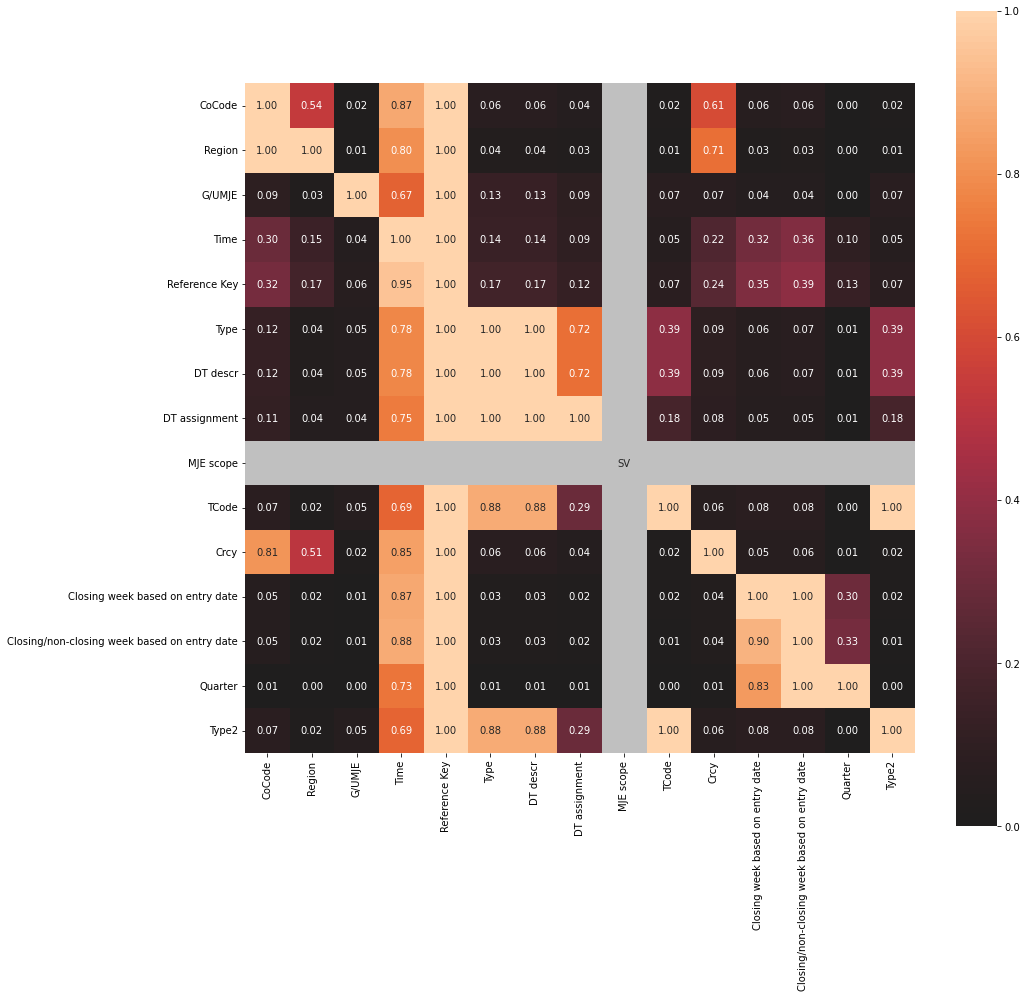

{'ax': <AxesSubplot:>,
 'corr':                                                 CoCode    Region    G/UMJE  \
 CoCode                                        1.000000  0.535281  0.015394   
 Region                                        1.000000  1.000000  0.009991   
 G/UMJE                                        0.086234  0.029959  1.000000   
 Time                                          0.295657  0.146454  0.040974   
 Reference Key                                 0.323738  0.173291  0.057792   
 Type                                          0.120751  0.036347  0.045761   
 DT descr                                      0.120751  0.036347  0.045761   
 DT assignment                                 0.114564  0.039487  0.043450   
 MJE scope                                     0.000000  0.000000  0.000000   
 TCode                                         0.072049  0.021657  0.054271   
 Crcy                                          0.813857  0.512164  0.016352   
 Closing week based o

In [17]:
# Calculate the correlation/strength-of-association of features in data-set
# with categorical features using:
# Cramer's V or Theil's U for categorical-categorical cases

associations(MJE_categorical, nom_nom_assoc='theil', figsize=(15, 15), cmap=None, cbar=True)

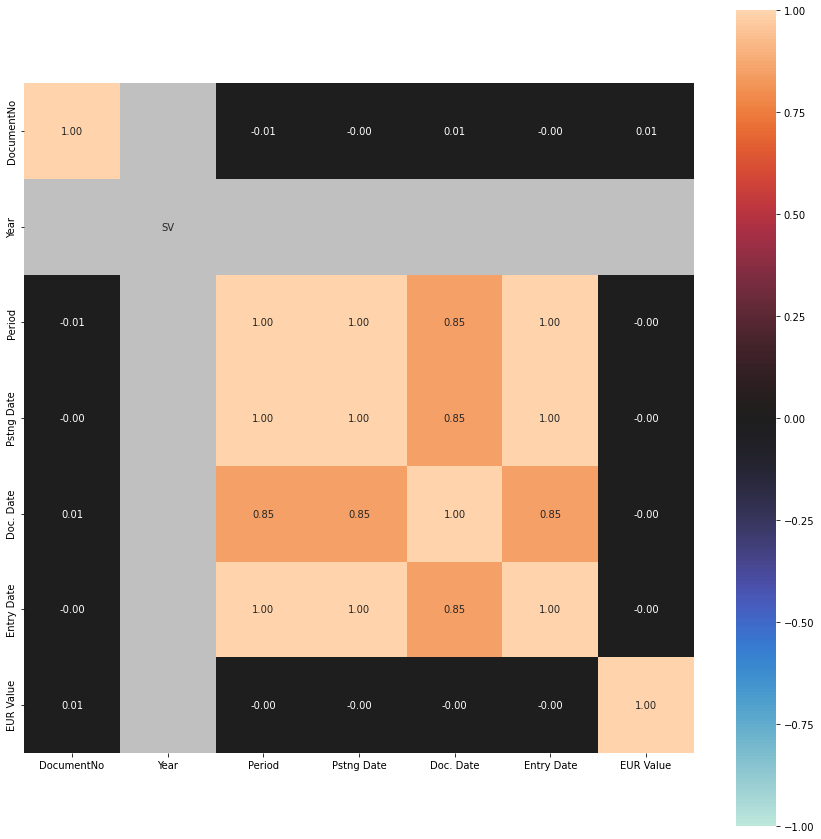

{'ax': <AxesSubplot:>,
 'corr':             DocumentNo  Year    Period  Pstng Date  Doc. Date  Entry Date  \
 DocumentNo    1.000000   0.0 -0.005612   -0.002185   0.006679   -0.002384   
 Year          0.000000   0.0  0.000000    0.000000   0.000000    0.000000   
 Period       -0.005612   0.0  1.000000    0.998635   0.847960    0.998796   
 Pstng Date   -0.002185   0.0  0.998635    1.000000   0.851160    0.999761   
 Doc. Date     0.006679   0.0  0.847960    0.851160   1.000000    0.851004   
 Entry Date   -0.002384   0.0  0.998796    0.999761   0.851004    1.000000   
 EUR Value     0.005563   0.0 -0.002054   -0.002017  -0.001354   -0.002029   
 
             EUR Value  
 DocumentNo   0.005563  
 Year         0.000000  
 Period      -0.002054  
 Pstng Date  -0.002017  
 Doc. Date   -0.001354  
 Entry Date  -0.002029  
 EUR Value    1.000000  }

In [18]:
# Calculate the correlation/strength-of-association of features in data-set
# with continuous features using:
# Pearson's R for continuous-continuous cases

associations(MJE_numerical, nom_nom_assoc='pearson', figsize=(15, 15), cmap=None, cbar=True)

In [19]:
MJE_numerical.describe(include='all').applymap(lambda x: f"{x:0.1f}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,DocumentNo,Year,Period,Pstng Date,Doc. Date,Entry Date,EUR Value
count,56140.0,56140.0,56140.0,56140.0,56140.0,56140.0,56140.0
unique,nan,nan,nan,325.0,479.0,332.0,nan
top,nan,nan,nan,0.1f,0.1f,0.1f,nan
freq,nan,nan,nan,2923.0,2975.0,1624.0,nan
first,nan,nan,nan,0.1f,0.1f,0.1f,nan
last,nan,nan,nan,0.1f,0.1f,0.1f,nan
mean,7982232924.2,2021.0,6.8,nan,nan,nan,2216304.6
std,606605870.3,0.0,3.5,nan,nan,nan,190643110.8
min,6400000015.0,2021.0,1.0,nan,nan,nan,0.0
25%,7500001567.8,2021.0,4.0,nan,nan,nan,32565.3


In [20]:
MJE_categorical.describe(include='all')

,CoCode,Region,G/UMJE,Time,Reference Key,Type,DT descr,DT assignment,MJE scope,TCode,Crcy,Closing week based on entry date,Closing/non-closing week based on entry date,Quarter,Type2
count,56140,56140,56140,56140,56140,56140,56140,56140,56140,56140,56140,56140,56140,56140,56140
unique,148,11,2,37123,56140,20,20,8,1,3,94,85,96,4,3
top,FI85,WE,GMJE,17:07:01,6630000017AE802021,SA,G/L account document,R2R - Accounting / Journal Entry,Yes,FB01,EUR,Non-closing week,P12 Non-closing week,Q4,Permanent
freq,15049,23129,37786,10,1,13520,13520,26734,56140,27200,22554,9688,1666,15393,27200


In [ ]:
import seaborn as sns
sns.pairplot(MJE.sample(35000))